In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
flag = cv2.IMREAD_GRAYSCALE

In [12]:
image = cv2.imread('test_v2//test//TEST_0001.jpg', flag)

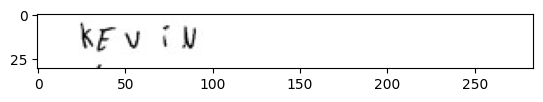

In [4]:
plt.imshow(image, cmap='gray')

In [5]:
print(image.shape)

(31, 284)


In [6]:
import os

In [9]:
path = 'train_v2//train'

file_list = os.listdir(path)

#print ("file_list: {}".format(file_list))

In [10]:
max_x = 0
max_y = 0

for i in file_list:
    image = cv2.imread(path + '//' + i, flag)
    x = image.shape[0]
    y = image.shape[1]

    if x > max_x:
        max_x = x
    if y > max_y:
        max_y = y

In [11]:
print(max_x, max_y) #test folder: 72 388
                    #train folder: 72 388
                    #validation folder: 

72 388


In [30]:
def padding(img, shape_x=72, shape_y=388):
    x = img.shape[0]
    y = img.shape[1]

    #x padding
    dif = shape_x - x

    pad = 255 * np.ones((1, y))
    if dif % 2 == 1:
        dif = dif - 1
        img = np.concatenate((pad, img), axis=0)

    iter = int(dif/2)

    for i in range(0, iter):
        img = np.concatenate((pad, img), axis=0)
        img = np.concatenate((img, pad), axis=0)

    #y padding
    dif = shape_y - y
    pad = 255 * np.ones((shape_x, 1))
    if dif % 2 == 1:
        dif = dif - 1
        img = np.concatenate((pad, img), axis=1)

    iter = int(dif/2)
    
    for i in range(0, iter):
        img = np.concatenate((pad, img), axis=1)
        img = np.concatenate((img, pad), axis=1)
        
    return img

In [31]:
pad_img = padding(image)

In [32]:
print(pad_img.shape)

(72, 388)


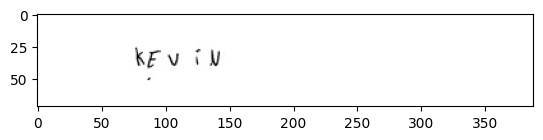

In [33]:
plt.imshow(pad_img, cmap='gray')